<a href="https://colab.research.google.com/github/RfaelJBC/Accidents_prediction_with_Python/blob/main/Trabalho_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

:Equipe OsInimigosDoSeminário: Bernardo Ruas,Heuller Ramos,Nicolas Marques da Silva,Rafael josé Braga Coelho,Maria Fernanda de Oliveira Vicente

https://www.kaggle.com/datasets/deepcontractor/australian-fatal-car-accident-data-19892021

In [ ]:
#módulos importantes
from sklearn import preprocessing
from sklearn import datasets
import pandas
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score,KFold
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn import metrics
import plotly.express as px
from distutils.core import setup


In [ ]:
tabela = pandas.read_csv ('https://raw.githubusercontent.com/RfaelJBC/Accidents_prediction_with_Python/main/Crash_Data.csv')
tabela.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (10,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.



,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20212133,Vic,9,2021,Sunday,0:30,Single,NaN,NaN,NaN,...,38,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Weekend,Night
1,20214022,SA,9,2021,Saturday,23:31,Multiple,No,No,No,...,28,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Weekend,Night
2,20212096,Vic,9,2021,Saturday,23:00,Single,NaN,NaN,NaN,...,19,Inner Regional Australia,Hume,Wangaratta (RC),Access road,No,No,17_to_25,Weekend,Night
3,20212145,Vic,9,2021,Saturday,22:25,Single,NaN,NaN,NaN,...,23,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Weekend,Night
4,20212075,Vic,9,2021,Saturday,5:15,Single,NaN,NaN,NaN,...,46,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Weekend,Night


# TUDO É STRING!!!!

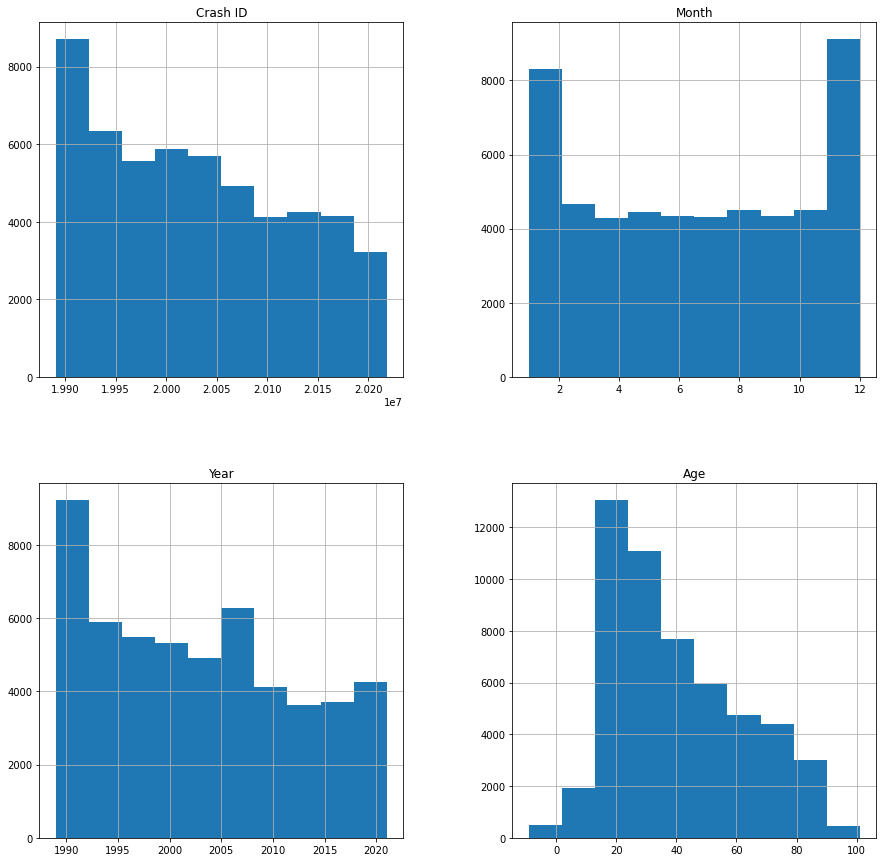

In [ ]:
hist_todos = tabela.hist(figsize=(15,15))

plt.show()

In [ ]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52843 entries, 0 to 52842
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Crash ID                       52843 non-null  int64 
 1   State                          52843 non-null  object
 2   Month                          52843 non-null  int64 
 3   Year                           52843 non-null  int64 
 4   Dayweek                        52843 non-null  object
 5   Time                           52803 non-null  object
 6   Crash Type                     52843 non-null  object
 7   Bus Involvement                52821 non-null  object
 8   Heavy Rigid Truck Involvement  32328 non-null  object
 9   Articulated Truck Involvement  52821 non-null  object
 10  Speed Limit                    52141 non-null  object
 11  Road User                      52843 non-null  object
 12  Gender                         52816 non-null  object
 13  A

In [ ]:

#mostra os valores nulos
tabela.isnull().sum()

Crash ID                             0
State                                0
Month                                0
Year                                 0
Dayweek                              0
Time                                40
Crash Type                           0
Bus Involvement                     22
Heavy Rigid Truck Involvement    20515
Articulated Truck Involvement       22
Speed Limit                        702
Road User                            0
Gender                              27
Age                                  0
National Remoteness Areas        45965
SA4 Name 2016                    45951
National LGA Name 2017           45950
National Road Type               45966
Christmas Period                     0
Easter Period                        0
Age Group                           90
Day of week                          0
Time of day                          0
dtype: int64

In [ ]:
#Transformando tabelas string em binario
tabela = pandas.get_dummies(tabela,columns=['Time of day','Day of week','Crash Type','Gender','Christmas Period','Easter Period'],drop_first=True)

#tirando colunas desnecessarias
tabela.drop(['National Remoteness Areas','National LGA Name 2017','SA4 Name 2016','Gender_Unspecified'], inplace=True, axis=1)

tabela.loc

tabela.head()
tabela.describe(include = 'object')
tabela


,Crash ID,State,Month,Year,Dayweek,Time,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,Road User,Age,National Road Type,Age Group,Time of day_Night,Day of week_Weekend,Crash Type_Single,Gender_Male,Christmas Period_Yes,Easter Period_Yes
0,20212133,Vic,9,2021,Sunday,0:30,NaN,NaN,NaN,NaN,Motorcycle rider,38,Arterial Road,26_to_39,1,1,1,1,0,0
1,20214022,SA,9,2021,Saturday,23:31,No,No,No,110,Pedestrian,28,NaN,26_to_39,1,1,0,0,0,0
2,20212096,Vic,9,2021,Saturday,23:00,NaN,NaN,NaN,NaN,Passenger,19,Access road,17_to_25,1,1,1,1,0,0
3,20212145,Vic,9,2021,Saturday,22:25,NaN,NaN,NaN,NaN,Driver,23,Arterial Road,17_to_25,1,1,1,1,0,0
4,20212075,Vic,9,2021,Saturday,5:15,NaN,NaN,NaN,NaN,Motorcycle rider,46,Local Road,40_to_64,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52838,19891246,NSW,1,1989,Wednesday,17:05,Yes,NaN,No,60,Passenger,5,NaN,0_to_16,0,0,1,0,0,0
52839,19895088,WA,1,1989,Monday,6:00,No,NaN,No,110,Passenger,19,NaN,17_to_25,0,0,1,1,1,0
52840,19895088,WA,1,1989,Monday,6:00,No,NaN,No,110,Passenger,17,NaN,17_to_25,0,0,1,1,1,0
52841,19895088,WA,1,1989,Monday,6:00,No,NaN,No,110,Passenger,17,NaN,17_to_25,0,0,1,1,1,0


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
#Tabela de relação das variaveis
#sns.heatmap(, annot=True)
tabela.corr()

,Crash ID,Month,Year,Age,Time of day_Night,Day of week_Weekend,Crash Type_Single,Gender_Male,Christmas Period_Yes,Easter Period_Yes
Crash ID,1.000000,-0.022206,0.999845,0.125084,-0.050559,-0.019933,0.017240,0.028881,-0.002319,0.078754
Month,-0.022206,1.000000,-0.022422,-0.008221,0.012958,0.006892,0.007086,0.002600,0.136406,-0.056008
Year,0.999845,-0.022422,1.000000,0.126277,-0.051172,-0.020479,0.016037,0.028766,-0.002313,0.078675
Age,0.125084,-0.008221,0.126277,1.000000,-0.258506,-0.149482,-0.079767,-0.096733,-0.022503,0.000099
Time of day_Night,-0.050559,0.012958,-0.051172,-0.258506,1.000000,0.249312,0.207061,0.130809,-0.003346,0.004762
Day of week_Weekend,-0.019933,0.006892,-0.020479,-0.149482,0.249312,1.000000,0.103498,0.056073,-0.026155,0.008483
Crash Type_Single,0.017240,0.007086,0.016037,-0.079767,0.207061,0.103498,1.000000,0.070390,0.010556,0.003499
Gender_Male,0.028881,0.002600,0.028766,-0.096733,0.130809,0.056073,0.070390,1.000000,-0.010407,-0.000120
Christmas Period_Yes,-0.002319,0.136406,-0.002313,-0.022503,-0.003346,-0.026155,0.010556,-0.010407,1.000000,-0.012805
Easter Period_Yes,0.078754,-0.056008,0.078675,0.000099,0.004762,0.008483,0.003499,-0.000120,-0.012805,1.000000


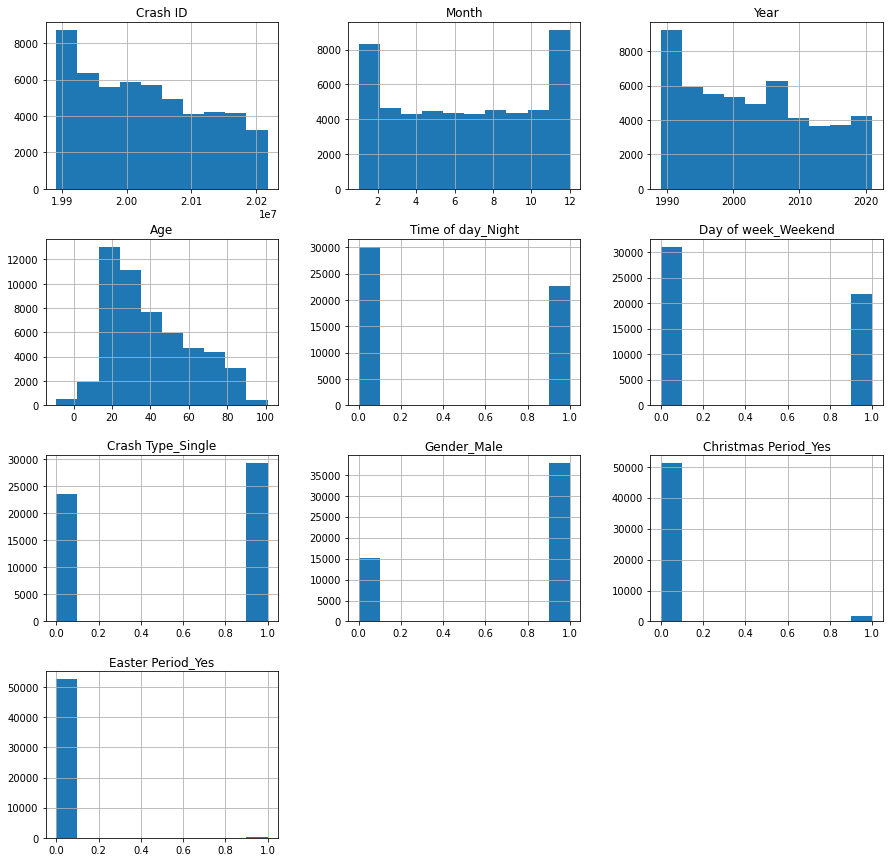

In [ ]:

hist_todos = tabela.hist(figsize=(15,15))

plt.show()


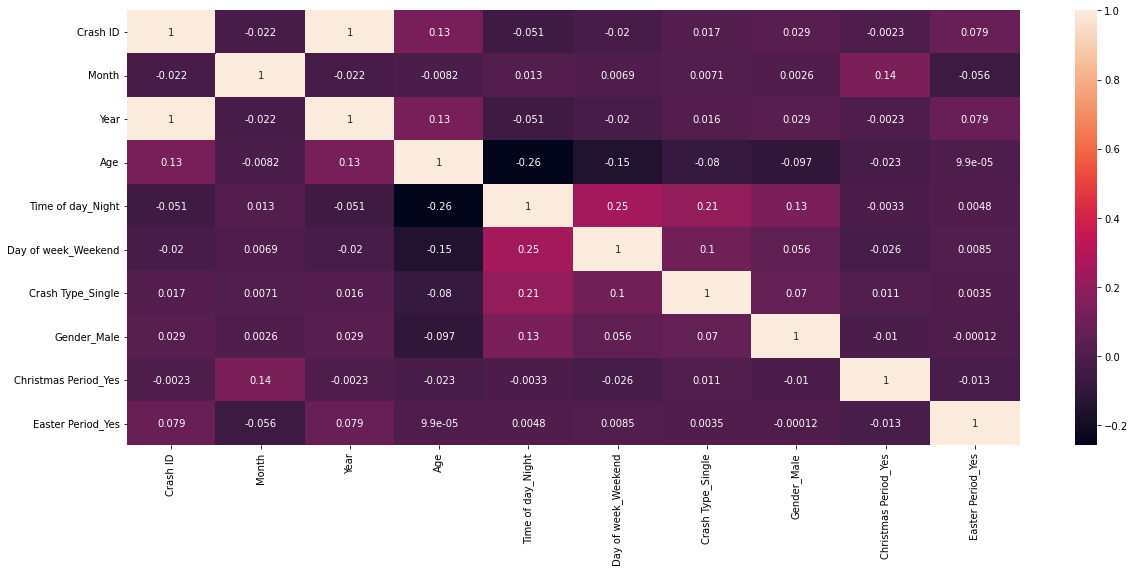

In [ ]:
plt.figure(figsize = (20,8))
sns.heatmap(tabela.corr(), annot=True)

In [ ]:
fig=px.pie(tabela.groupby('Age Group',as_index=False)['Crash ID'].count().
           sort_values(by='Crash ID',ascending=False),names='Age Group',
           values='Crash ID',color='Age Group',labels={'Age Group':'faixa idade','Crash ID':'contagem'},
           template='ggplot2',title='Acidentes por faixa de idade')
fig.show()

In [ ]:
fig=px.pie(tabela.groupby('Gender_Male',as_index=False)['Crash ID'].count().
           sort_values(by='Crash ID',ascending=False),names='Gender_Male',
           values='Crash ID',color='Crash ID',labels={'Gender_Male':'Gênero','Crash ID':'contagem'},
           template='ggplot2',title='Acidentes por Gênero')
fig.show()

In [ ]:
fig=px.pie(tabela.groupby('Crash Type_Single',as_index=False)['Crash ID'].count().
           sort_values(by='Crash ID',ascending=False),names='Crash Type_Single',
           values='Crash ID',color='Crash ID',labels={'Dayweek':'Gênero','Crash ID':'contagem'},
           template='ggplot2',title='Tipo de acidentes')
fig.show()

In [ ]:
tabela.loc[:,"Age Group"] = tabela['Age Group'].replace(['0_to_16','17_to_25','26_to_39','40_to_64','65_to_74','75_or_older'],[0,1,2,3,4,5])



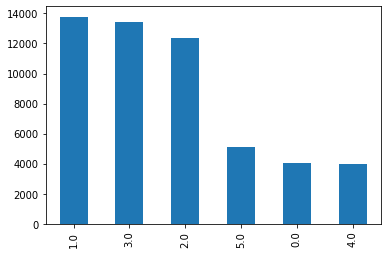

In [ ]:
fig=tabela['Age Group'].value_counts().plot.bar()

In [ ]:
#Apaga os nan/null da coluna "Age Group"


#tabela=tabela.iloc[tabela['Age Group'].dropna(),:]


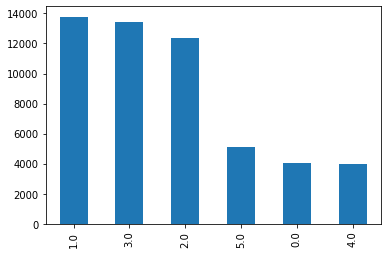

In [ ]:
fig=tabela['Age Group'].value_counts().plot.bar()

In [ ]:
tabela.shape

(52843, 20)

In [ ]:
tabela.loc[:,"Dayweek"] = tabela['Dayweek'].replace(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],[1,2,3,4,5,6,7])


In [ ]:
tabela

,Crash ID,State,Month,Year,Dayweek,Time,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,Road User,Age,National Road Type,Age Group,Time of day_Night,Day of week_Weekend,Crash Type_Single,Gender_Male,Christmas Period_Yes,Easter Period_Yes
0,20212133,Vic,9,2021,1,0:30,NaN,NaN,NaN,NaN,Motorcycle rider,38,Arterial Road,2.0,1,1,1,1,0,0
1,20214022,SA,9,2021,7,23:31,No,No,No,110,Pedestrian,28,NaN,2.0,1,1,0,0,0,0
2,20212096,Vic,9,2021,7,23:00,NaN,NaN,NaN,NaN,Passenger,19,Access road,1.0,1,1,1,1,0,0
3,20212145,Vic,9,2021,7,22:25,NaN,NaN,NaN,NaN,Driver,23,Arterial Road,1.0,1,1,1,1,0,0
4,20212075,Vic,9,2021,7,5:15,NaN,NaN,NaN,NaN,Motorcycle rider,46,Local Road,3.0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52838,19891246,NSW,1,1989,4,17:05,Yes,NaN,No,60,Passenger,5,NaN,0.0,0,0,1,0,0,0
52839,19895088,WA,1,1989,2,6:00,No,NaN,No,110,Passenger,19,NaN,1.0,0,0,1,1,1,0
52840,19895088,WA,1,1989,2,6:00,No,NaN,No,110,Passenger,17,NaN,1.0,0,0,1,1,1,0
52841,19895088,WA,1,1989,2,6:00,No,NaN,No,110,Passenger,17,NaN,1.0,0,0,1,1,1,0


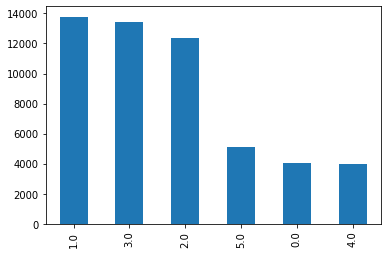

In [ ]:
fig=tabela['Age Group'].value_counts().plot.bar()

# Previsão Gênero

In [ ]:
#modelo descobre gênero

X = tabela[["Crash Type_Single","Time of day_Night"]]
#os rótulos
y = tabela.iloc[:,17]
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, random_state=1)
#importante que os dados tenham as mesmas dimensões
print(X.shape, y.shape)
classifier2 = KNeighborsClassifier(n_neighbors = 5)
#treina o modelo
classifier2.fit(X_treinamento, y_treinamento)
#predição dos valores
y_pred = classifier2.predict(X_teste)
#avaliar o desempenho: acurária = total de acertos/total
acuracia =  classifier2.score(X_teste,y_teste)

#validação cruzada
X= y_pred.reshape(-1, 1)
Y= y_teste
logreg=LogisticRegression()
kf=KFold(n_splits=5)
score=cross_val_score(logreg,X,Y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))


(52843, 2) (52843,)
Cross Validation Scores are [0.71963678 0.72975019 0.70514762 0.71536715 0.70893263]
Average Cross Validation score :0.7157668707966396


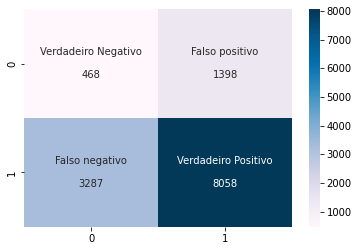

In [ ]:
cm = metrics.confusion_matrix(X,Y)

categories = ['Chance baixa', 'Chance baixa']
group_names = ['Verdadeiro Negativo\n','Falso positivo\n','Falso negativo\n','Verdadeiro Positivo\n']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]

labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels,fmt='', cmap='PuBu')


# Previsão de faixa de idade

In [ ]:
#modelo descobre faixa de idade

X = tabela[["Crash Type_Single","Gender_Male"]]
#os rótulos
y = tabela.iloc[:,13]
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y,test_size=0.20, random_state=1)
#importante que os dados tenham as mesmas dimensões
print(X.shape, y.shape)
classifier2 = KNeighborsClassifier(n_neighbors = 5)
#treina o modelo
classifier2.fit(X_treinamento, y_treinamento)
#predição dos valores
y_pred = classifier2.predict(X_teste)
#avaliar o desempenho: acurária = total de acertos/total
acuracia =  classifier2.score(X_teste,y_teste)

#validação cruzada
X= y_pred.reshape(-1, 1)
Y= y_teste
logreg=LogisticRegression()
kf=KFold(n_splits=5)
score=cross_val_score(logreg,X,Y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))


(52843, 2) (52843,)


ValueError: ignored

In [ ]:


with np.printoptions(threshold=np.inf):
   print(y_pred)

In [ ]:
confusion_matrix = metrics.confusion_matrix(X,Y)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()